In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
df=pd.read_csv("D:/code soft project material/advertising.csv")

In [75]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [76]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [77]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [79]:
df.max()

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

In [80]:
df['Sales_Label'] = pd.cut(x=df['Sales'],
                     bins=[10.0, 15.0, 20.0,27.0],
                     labels=['Good', 'Better', 'Best'])

In [81]:
df['Sales_Label'].value_counts()

Better    68
Good      59
Best      39
Name: Sales_Label, dtype: int64

In [82]:
df['Sales_Label'].fillna('Better',inplace=True)

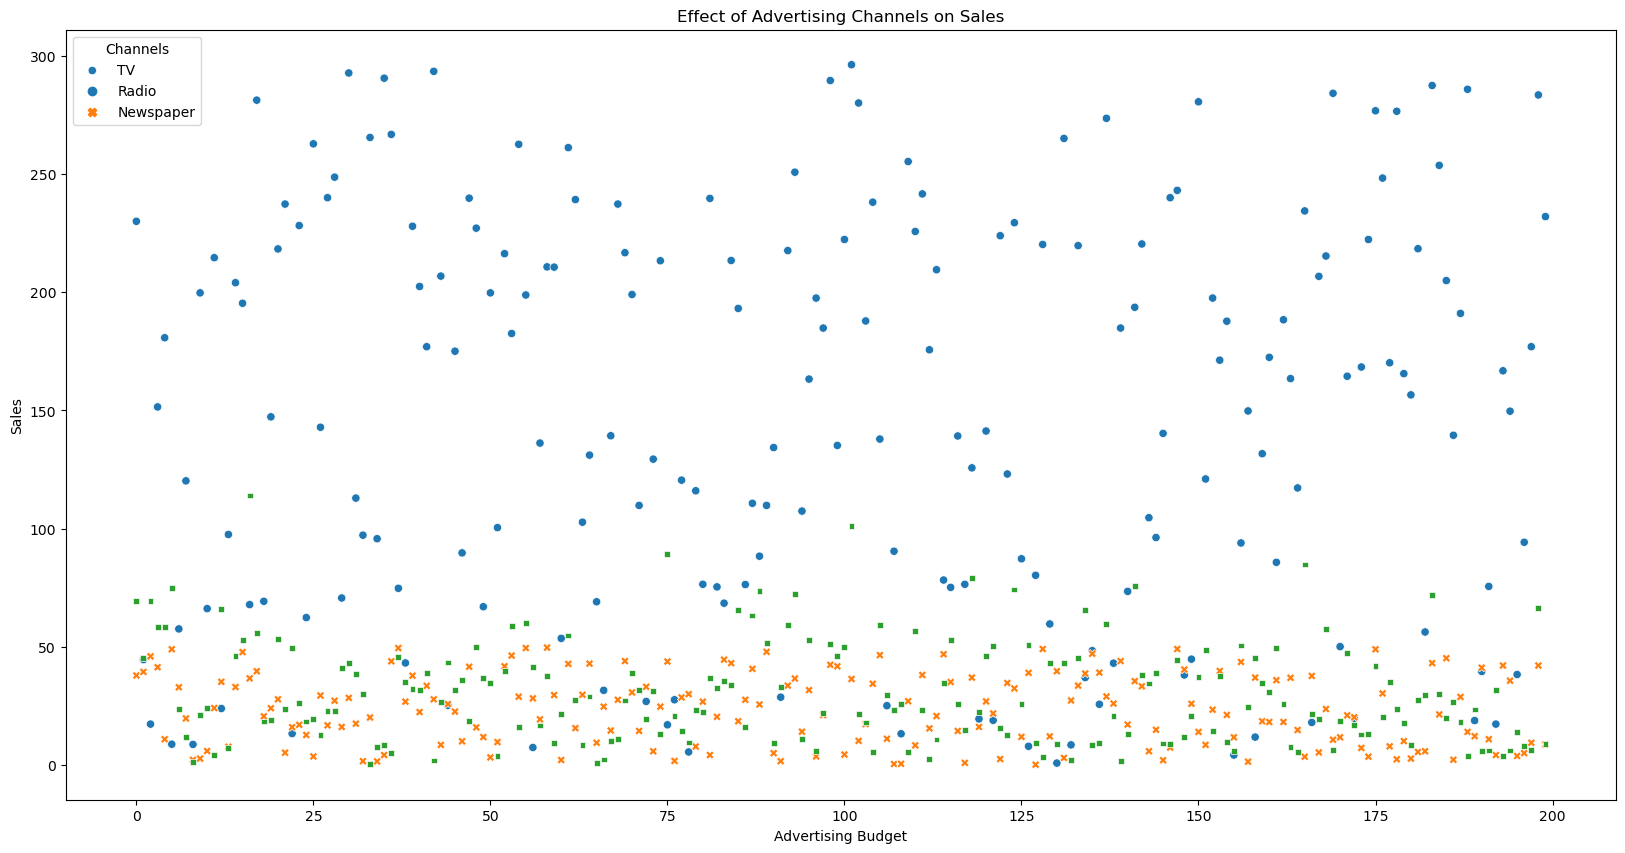

In [86]:

plt.figure(figsize=(20, 10))
sns.scatterplot(data=df[['TV', 'Radio', 'Newspaper']])

plt.xlabel("Advertising Budget")
plt.ylabel("Sales")
plt.title("Effect of Advertising Channels on Sales")

plt.legend(title="Channels", labels=["TV", "Radio", "Newspaper"])
plt.show()



C:\Users\btirk\AppData\Local\Temp\ipykernel_14792\3810683733.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

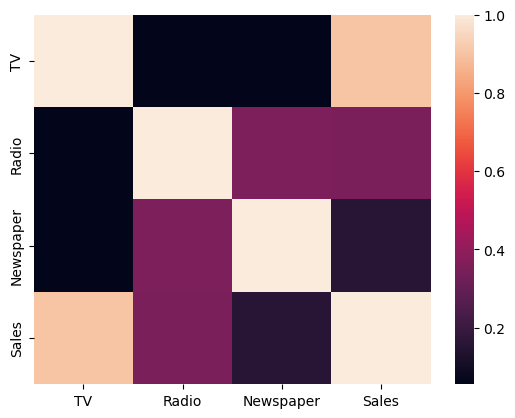

In [84]:
sns.heatmap(df.corr())
#conclusion sales is highly correlated to tv 

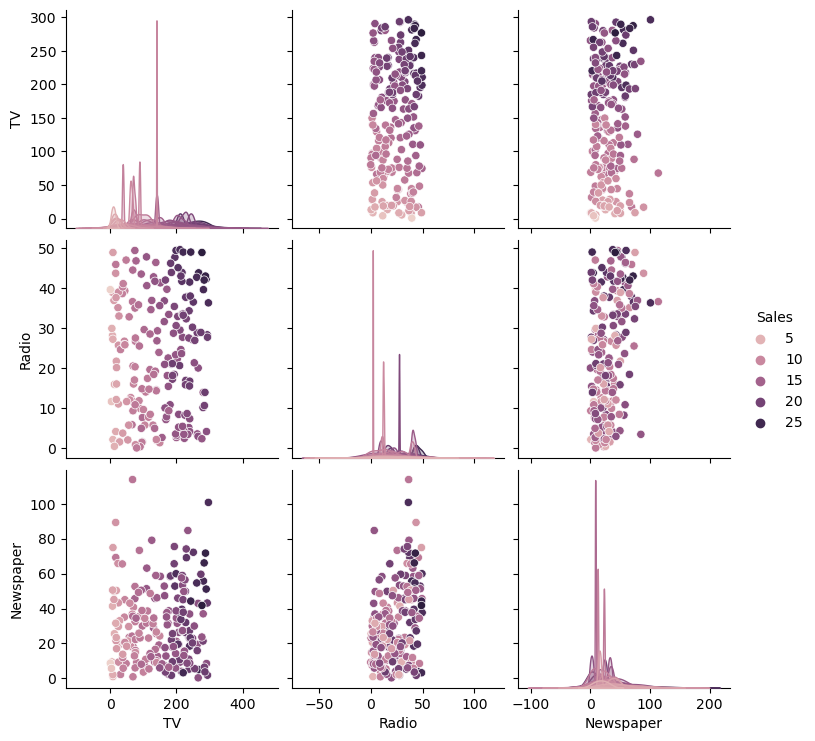

In [85]:
sns.pairplot(df,hue='Sales')

In [90]:
X = df["TV"].values.reshape(-1, 1)  
y = df["Sales"].values 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)


coef = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Linear Regression Coefficients (TV):", coef)
print("Linear Regression Intercept:", intercept)
print("Mean Squared Error:", mse)
print("R-squared (Coefficient of Determination):", r2)


Linear Regression Coefficients (TV): 0.055482943931463184
Linear Regression Intercept: 7.00710842824185
Mean Squared Error: 6.101072906773963
R-squared (Coefficient of Determination): 0.802561303423698
